## Problem Statement

Surprise Housing is a US based company debuting in Austrailian Real Estate Market. They specialize in buying houses in low price and sell them in higher price after renovating them using data analytics. The company needs to analyze and understand the patterns and important factors from the collected dataset of Sold houses in Austrailian market. The company is looking at prospective properties to buy to enter the market.

## Business Goals

- Our goal is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether the company should invest in them or not.

- The company wants to know the following things about the prospective properties:

- The variables which are significant in predicting the price of a house.

- How well those variables describe the price of a house.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step By Step Approach

- Read and Understand Data
- Data Exploration
- Data Visualization
    - Bivariate Analysis
    - Multicollinearity
- Feature Engineering
- Missing value treatment
- Data Preparation
- Normalization
- Dummy Variable Creation
- Model Building
    - Lasso Regression Model
    - Ridge Regression Model
- Comparision between two models
- Suggestions

In [1]:
# Let's start importing necessary libraries for data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# let's import all the necessary libraries for machine building and evaluation
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score, mean_squared_error

# hiding warnings
import warnings
warnings.filterwarnings('ignore')

# Setting display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

#### Data Understanding

In [2]:
# Let's load the data and look at the first five records 
# keep_default_na=False will prevent pandas to read 'NA' as 'NaN'
sup = pd.read_csv('train.csv', keep_default_na=False)
sup.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [3]:
# Let's look at the dimensions of the dataset
sup.shape

(1460, 81)

- There are 1460 rows and 81 columns, out of which many columns have 'NA' values.
- Here, NA values means that there are no such facilities like - no fireplace in property, no pool, no fence in the property, no ally in property etc
- So, we will replace the NA values with None.

In [4]:
# Let's replace the 'NA' values with None
sup[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = sup[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
sup.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
# Let's check Basic information on our dataset
sup.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL          65     8450   Pave  None      Reg   
1        2          20       RL          80     9600   Pave  None      Reg   
2        3          60       RL          68    11250   Pave  None      IR1   
3        4          70       RL          60     9550   Pave  None      IR1   
4        5          60       RL          84    14260   Pave  None      IR1   
5        6          50       RL          85    14115   Pave  None      IR1   
6        7          20       RL          75    10084   Pave  None      Reg   
7        8          60       RL          NA    10382   Pave  None      IR1   
8        9          50       RM          51     6120   Pave  None      Reg   
9       10         190       RL          50     7420   Pave  None      Reg   
10      11          20       RL          70    11200   Pave  None      Reg   
11      12          60       RL 

In [6]:
# Let's check the data types of the columns
sup.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

From the dataset description shared with us we have :-
- MSSubClass: Identifies the type of dwelling involved in the sale. (should be object type, but it is int64)
- LotFrontage: Linear feet of street connected to property.(should be numeric, but it is object type)
- OverallQual: Rates the overall material and finish of the house. (should be object type, but it is int64)
- OverallCond: Rates the overall condition of the house. (should be object type, but it is int64)
- MasVnrArea: Masonry veneer area in square feet. (should be numeric, but it is object type)
So, let's change thier data type first.

In [7]:
# Let's Convert 3 of the columns to 'object' type as mentioned above
sup[['MSSubClass', 'OverallQual', 'OverallCond']] = sup[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [8]:
# Let's Convert 2 of the columns to 'numeric' type as mentioned above
sup['LotFrontage'] = pd.to_numeric(sup['LotFrontage'], errors='coerce')
sup['MasVnrArea'] = pd.to_numeric(sup['MasVnrArea'], errors='coerce')

In [9]:
# Let's verify whether the data types of the above columns have changed or not
sup[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [10]:
# statistical description of numeric columns
sup.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# total sum of missing values
sup.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

##### Data Exploration
- We have understood our dataset.
- It has 1460 rows and 81 columns.
- We also have noticed a few missing values.
- We also changed a few variables' datatype as per our understanding of the data info shared.
- We have figured our target variable - SalePrice.
- **Now let's check if our target variable is normally distributed or if we need to normalize the variable.**

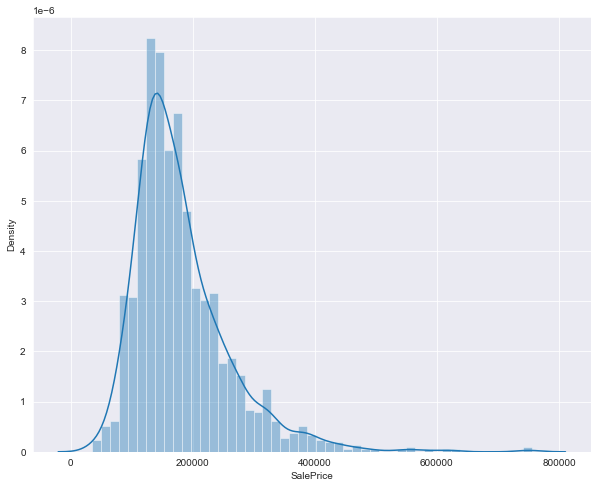

In [12]:
# let's analyse our target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(sup['SalePrice']);

- It is evident that the target variable 'SalePrice' does have some skewness. We should calculate it first then we can see, what could be done.

In [13]:
# let's Check the skewness and kurtosis of target variable
print(sup['SalePrice'].skew())
print(sup['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


- Skewness is a measure of symmetry, or should we say, the lack of symmetry in the data.
- If skewness value greater than 1 or less than -1, it indicates a highly skewed distribution. 
- A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
- A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
- Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. There is no upper limit for high kurtosis. Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0).

**Both skewness and kurtosis looks high. Let's normalize our target variable later after analysing other variables.**

## Data Visualization

##### Let's look at the columns in our data and randomly pick and plot a few of them to analyse.

In [14]:
sup.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# Let's now divide the dataframe sup into numerical and categorical columns for EDA
# separating numerical columns
sup_num = sup.select_dtypes(include=['int64', 'float64'])
# separating categorical columns
sup_cat = sup.select_dtypes(include='object')

In [16]:
# numerical columns are
sup_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# categorical columns are
sup_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

- Let's randomly pick variables from our dataset and plot them against our target variable ' SalePrice' for Bi-variate Analysis.

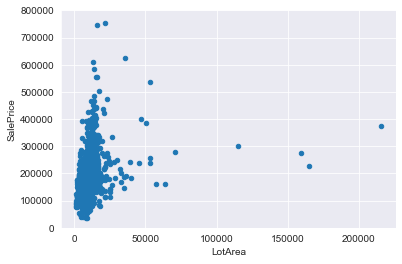

In [18]:
# Let's compare LotArea with SalePrice 
var = "LotArea"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

- There are some cases where house with higher LotArea didn't sell with high price, there must be some other factor affecting it.
- Let's check the age of the property, may be we can get some idea from it.

### Feature engineering

In [19]:
# Instead of having two columns, YrBuilt and YrSold , let's create a new column 'Age'  which describes the age of the house
sup['Age'] = sup['YrSold'] - sup['YearBuilt']
# Now, that we have created a separate column describing the age of the property, 
# let's drop the two old columns which don't serve any purpose now.
sup.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
# Let's View the dataframe again
sup.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,250000,8


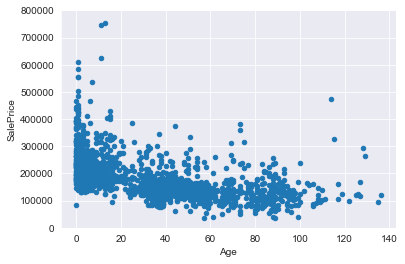

In [20]:
# Let's compare Age with SalePrice 
# Age Vs SalePrice
var = "Age"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

- Even though there are some really old houses which sell at fairly good prices, we can clearly see the sale price going up when the property is either new or has been constructed within 10 years.

In [21]:
# We have added a new column 'Age' and dropped two columns.
# Let's update our numerical and categorical column list
# separating numerical columns
sup_num = sup.select_dtypes(include=['int64', 'float64'])
# separating categorical columns
sup_cat = sup.select_dtypes(include='object')

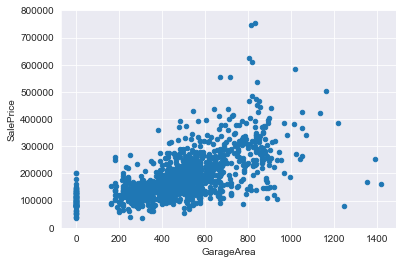

In [22]:
# Let's compare GarageArea with SalePrice 
var = "GarageArea"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

- Property with GarageArea between 600-1000 has been sold in really high price

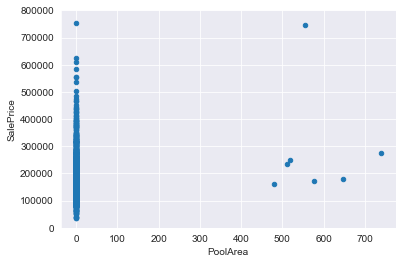

In [23]:
# Let's compare PoolArea with SalePrice 
var = "PoolArea"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

- We can see that 'PoolArea doesn't have a big role to play in the SalePrice.

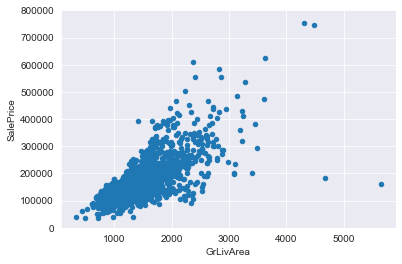

In [24]:
# Let's compare GrLivArea with SalePrice 
var = "GrLivArea"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

- There is a clear relation between GrLivArea and the SalePrice. The higher the GrLivArea, the higher the SalePrice.

In [25]:
sup_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

##### Let's do some bivariate analysis on the categorical columns

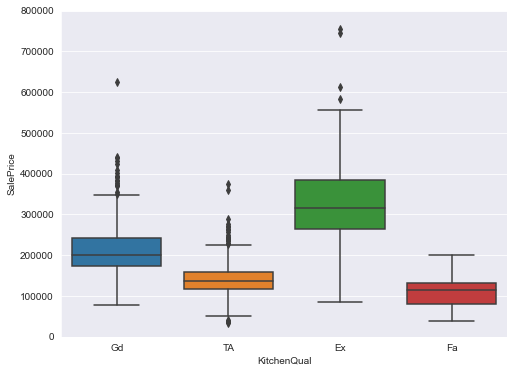

In [26]:
# Let's plot the levels of categorical columns one by one using box plots and analyse them
# KitchenQual vs SalePrice
var = "KitchenQual"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

- It is quite understandable from the plot that KitchenQual rated as 'Ex' that is 'Excellent' has the highest average 'SalePrice' among all other qualities which are - Good, Typical/Average, and Fair. 
- The higher the 'KitchenQual' rating, higher the 'SalePrice'.

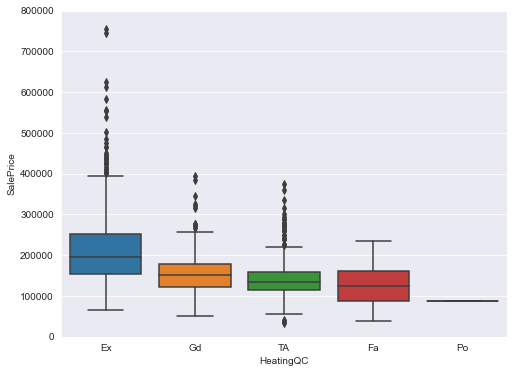

In [27]:
# HeatingQC vs SalePrice
var = "HeatingQC"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

- As we assumed, here also, when the 'HeatingQC' - Heating Quality and Condition - is excellent, the house was sold in a much better and higher 'SalePrice' than others.
- Better the HeatingQC rating, better the sale price.

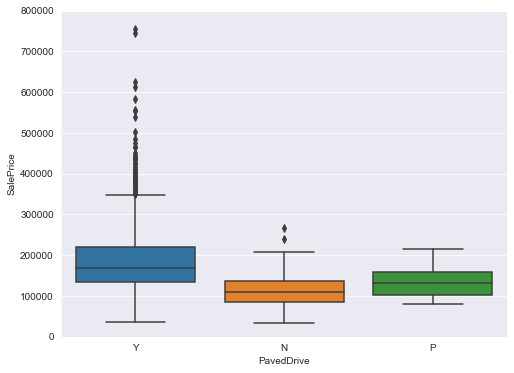

In [28]:
# PavedDrive vs SalePrice
var = "PavedDrive"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

- The houses with fully paved and partially paved drive have been sold in much better price than the houses with 'Gravel or Dirt' based paved drive.
- The company can focus on flipping the paved drive as well which will result in a higher 'SalePrice'.

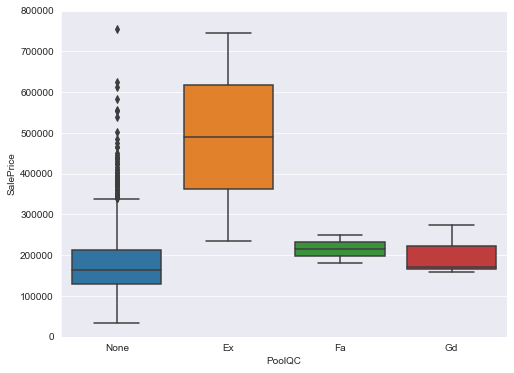

In [29]:
# PoolQC vs SalePrice
var = "PoolQC"
data = pd.concat([sup.SalePrice, sup[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

- It is obvious that the houses with 'Excellent' rated pool quality and condition have been sold in range 250000 to 750000 approximately, which is higher than the average 'SalePrice' of all other categories.
- 'PoolQC' with 'Ex' rating must be coming under luxury property, so company can focus on this factor of the propertty as well.

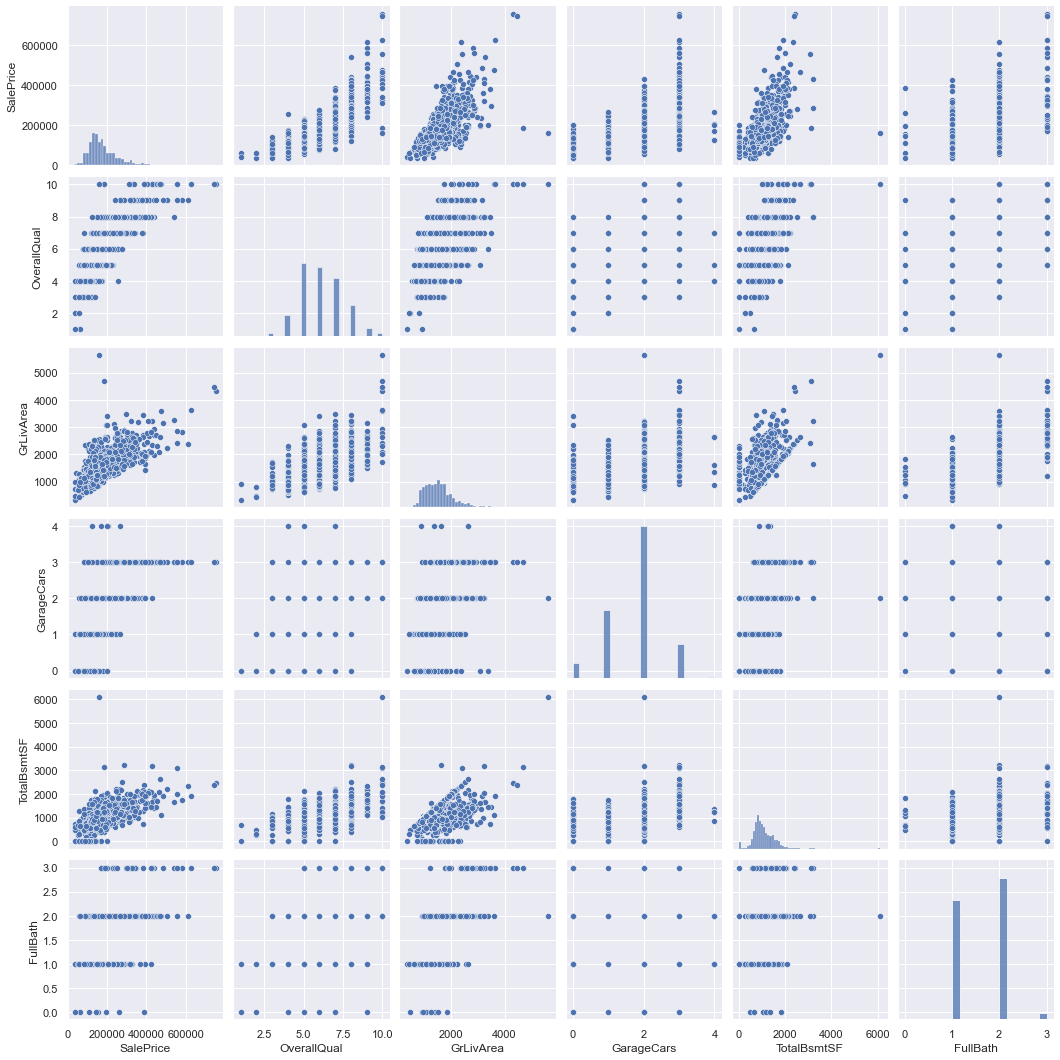

In [30]:
# Let's plot multiple scatter plots with some more features to understand the data better 
sns.set()
cols = [ 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(sup[cols], size=2.5)
plt.show()

- We can see some really strong correlation between target variable 'SalePrice' and some of the variables here such as TotalBsmtSF, OverallQual, GarageCars, FullBath etc. 
- Let's plot the correlation heat map to see how strongly they are correlated.

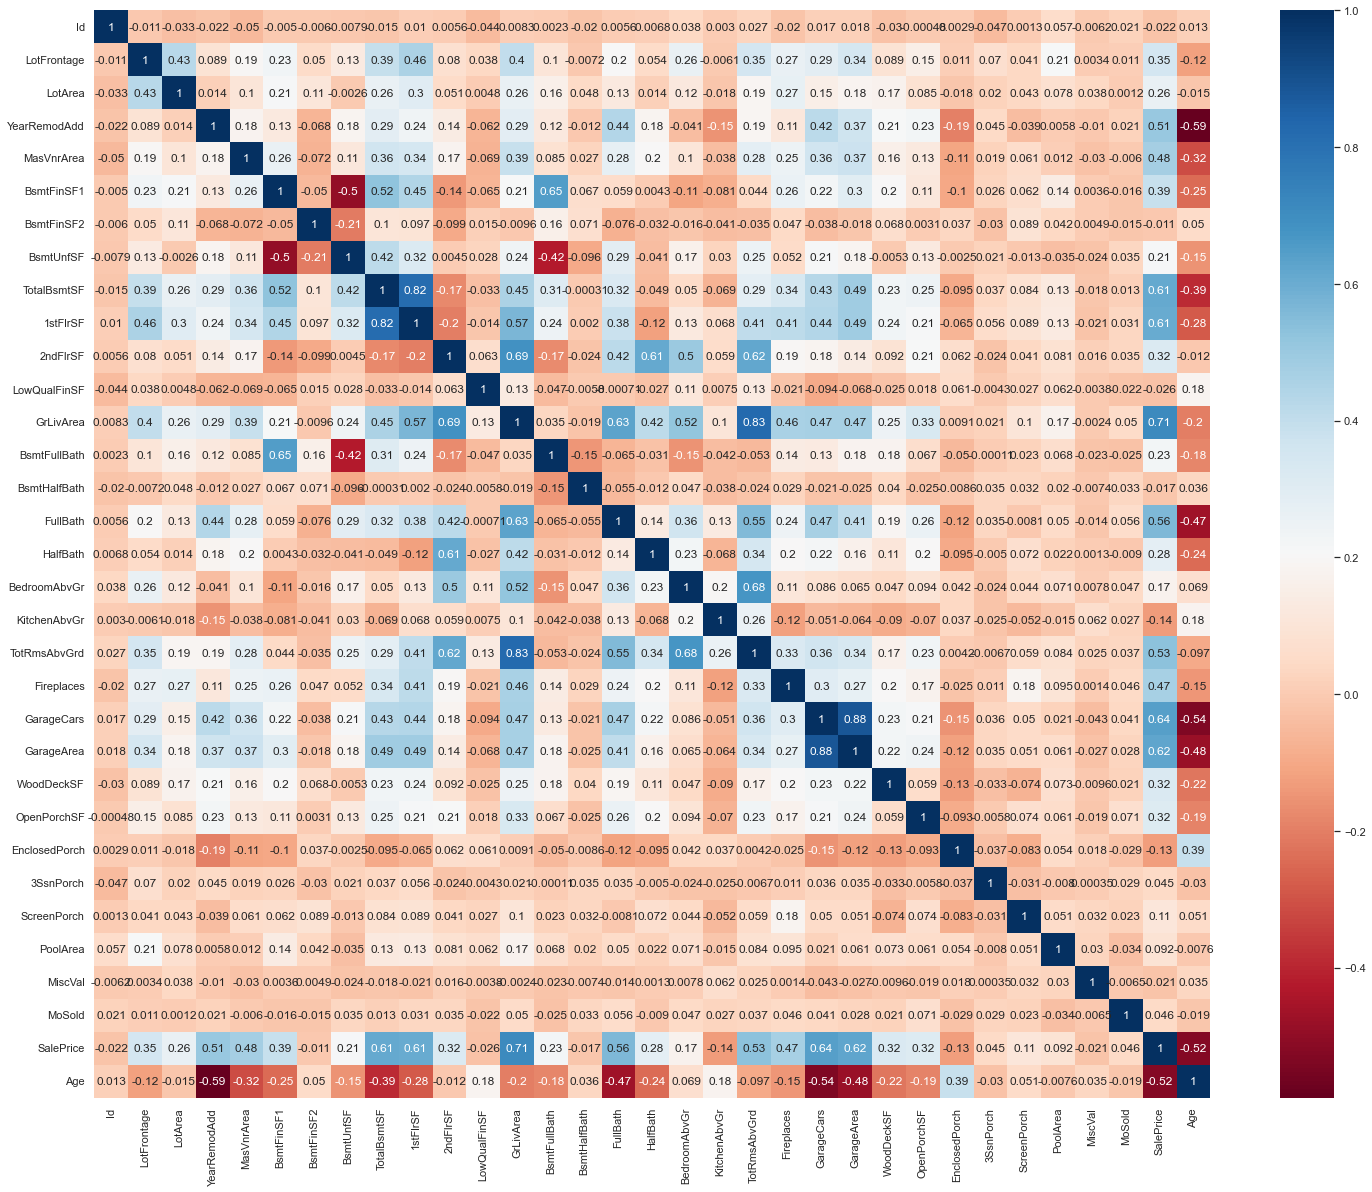

In [31]:
# Correlation heat map
# Let's Plot heatmap to detect correlations among all the numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(sup_num.corr(), annot=True, cmap='RdBu');

- SalePrice has high correlation with - GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath,YearRemodAdd, TotlRmsAbvGrd etc.
- Let's look at the top 10 highly correlated variables with our target variable - SalePrice.

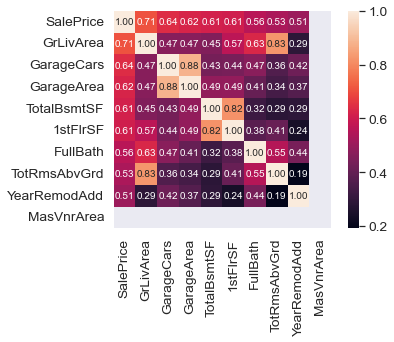

In [32]:
# saleprice correlation matrix - to identify Multicollinearity
k = 10 # number of variables for heatmap
corrmat = sup.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(sup[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Missing Value Treatment

In [33]:
# During our initial steps of 'Data Understanding' we noticed there were some missing values.
# we need to treat them before we move forward with the model building
# so, Let's have a look at the missing values in all features again
sup.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [34]:
# Let's replace missing values in the above mentioned two columns by their means - both are numeric fields
sup['LotFrontage'].fillna(sup['LotFrontage'].mean(), inplace=True)
sup['MasVnrArea'].fillna(sup['MasVnrArea'].mean(), inplace=True)

In [35]:
# Let's Check for missing values again to verify our imputation
sup.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

- There were missing values in two columns - 'LotFrontAge' and 'MasVnrArea'
- Both the columns happen to be numerical, so we have imputed the missing values with the mean values of respective columns.
- Now, thee are no missing values as such.

#### Dummy Variable Creation and Data Preparartion
- Let's figure out the datatype of all existing features

In [36]:
types_train = sup.dtypes
num_train = types_train[(types_train == "int64") | (types_train == "float")]
cat_train = types_train[types_train == "object"]

In [37]:
# Let's check how many variables belong to which datatype
pd.DataFrame(types_train).reset_index()[0].value_counts()

object     47
int64      31
float64     2
Name: 0, dtype: int64

- there are 47 object type, 31 integer type and 2 float type features present in our dataset

In [38]:
# Columns included in numerical type
numerical_values_train = list(num_train.index)
numerical_values_train

['Id',
 'LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'Age']

In [39]:
# Columns included in categorical type
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Data Preparation (Normalizing Target Variable - 'SalePrice')

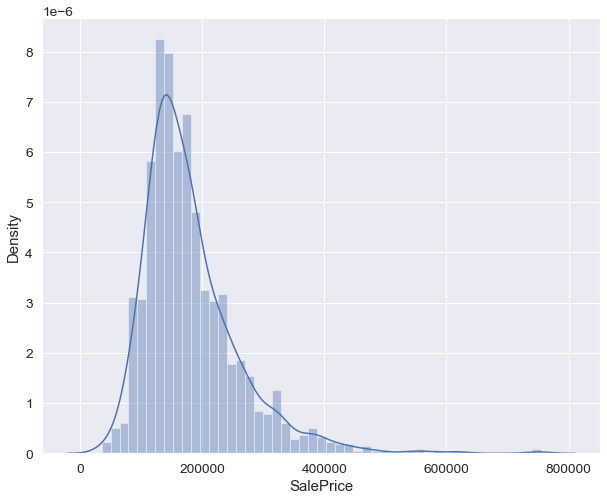

In [40]:
# we previously noticed some skewness in our target variable
# Now, that we have finished our exploratory data analysis we can normalize our target variable
# let's analyse our target variable 'SalePrice' again and then proceed with the normalization
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(sup['SalePrice']);

In [41]:
# checking the skew and kurt
print(sup['SalePrice'].skew())
print(sup['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


In [42]:
# We shall apply Log transform on the target variable
sup['SalePrice'] = np.log(sup['SalePrice'])
sup['SalePrice'].skew()

0.12133506220520406

In [43]:
# Checking the kurtosis of target variable again
sup['SalePrice'].kurt()

0.8095319958036296

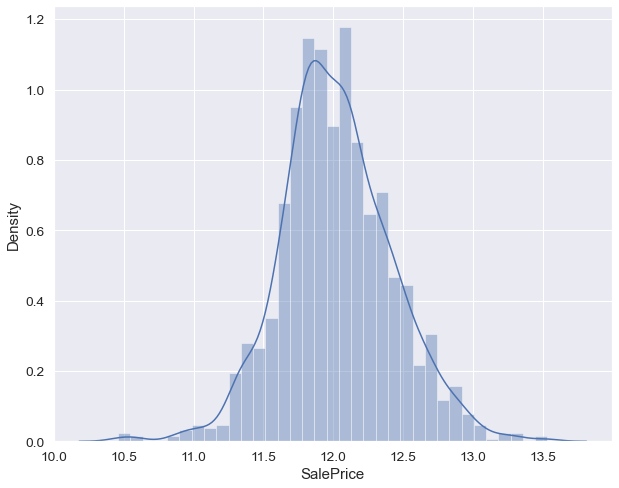

In [44]:
# Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(sup['SalePrice']);

#### Dummy Variable Creation

In [45]:
# dummification
sup_num = sup.select_dtypes(include=['int64', 'float64'])
sup_cat = sup.select_dtypes(include='object')
# One hot encoding the categorical columns
sup_cat_encoded = pd.get_dummies(sup_cat, drop_first=True)
sup_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,Garag

In [46]:
# Let's check the shape of the dataset now
sup_cat_encoded.shape

(1460, 353)

In [47]:
# concatenating the dummy variables into our dataset
sup = pd.concat([sup_num, sup_cat_encoded], axis=1)
# Let's check the first few rows of our dataframe
sup.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,

### Modeling Preparation

In [48]:
# We shall now split the dataset into two parts, X contains all independent variables, y with only target variable
# We'll use X i.e, all independent variables to make predictions 
# except 'Id' (not relevant) and 'SalePrice' (target variable)
X = sup.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1

In [49]:
# y will contain 'target variable - SalePrice' only
y = sup["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [50]:
# Now, let's Split X and y into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [51]:
# Let's check out the dimensions of our train data
print(X_train.shape)
print(y_train.shape)

(1022, 384)
(1022,)


In [52]:
# now, let's see the dimensions of our test data
print(X_test.shape)
print(y_test.shape)

(438, 384)
(438,)


In [53]:
# we shall now create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols


['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [54]:
# Creating a list of numerical columns to be scaled
cat_cols = list(X_train.select_dtypes(include=['object']).columns)
cat_cols

[]

In [55]:
# List of alphas to tune

params = { 'alpha' : [
    0.0001, 0.001, 0.01, 0.05,
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
    10.0, 20, 50, 100, 500, 1000
]}
params

{'alpha': [0.0001,
  0.001,
  0.01,
  0.05,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  20,
  50,
  100,
  500,
  1000]}

In [56]:
# Creating a scaling instance
scaler = StandardScaler()

# Scaling the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [57]:
# Let's now define a function for checking all the metrics to evaluate our model
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Here we shall take the values of y_train and y_test, and predicted y_train and y_test as inputs.
    and return - R-Squared (Train), R-Squared (Test), RSS (Train),RSS (Test), MSE (Train), MSE (Test), RMSE (Train),RMSE (Test
    
    We shall return all the above evaluation in a list.
    
    '''
    
    # initializing a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    # R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    # Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

### Lasso Regression

In [58]:
# Applying Lasso

# Now to create a Lasso model
# we will run a cross validation on a list of alphas to find the optimum best of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# let's view the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.3976716 , 0.11905727, 0.0381804 , 0.0278409 , 0.02524805,
        0.02352657, 0.02258077, 0.03044629, 0.02361526, 0.02639394,
        0.02803955, 0.0213232 , 0.02062249, 0.02128291, 0.02151432,
        0.02183981, 0.02970881, 0.02450757, 0.01810699, 0.01976876,
        0.0175612 , 0.02720795, 0.0240653 , 0.02394018, 0.02187529,
        0.02222319, 0.02570276, 0.01479783]),
 'std_fit_time': array([0.10152748, 0.0146244 , 0.00854646, 0.01162019, 0.00761211,
        0.00813062, 0.00719662, 0.01054507, 0.00413587, 0.00805409,
        0.00730951, 0.0052472 , 0.00618452, 0.01057396, 0.00760966,
        0.0073027 , 0.00705662, 0.00769645, 0.00715512, 0.00507382,
        0.00383569, 0.00630073, 0.007032  , 0.00716595, 0.00764975,
        0.00761321, 0.00952744, 0.00394871]),
 'mean_score_time': array([0.00394487, 0.0057343 , 0.00625043, 0.00624628, 0.00950351,
        0.00625682, 0.00624685, 0.01005182, 0.00075736, 0.00892868,
        0.00540862, 0.00627155, 0.003124

In [60]:
# let's view the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [61]:
# Creating a lasso regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [62]:
# Fitting the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [63]:
# the coefficients of lasso fitted model
lasso.coef_

array([-9.35850876e-03,  1.54829852e-02,  3.33248756e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77867176e-03,  2.94375298e-03,  4.08957130e-03,
        0.00000000e+00,  1.61506189e-03,  1.21966880e-04,  1.10824503e-01,
        2.47643784e-02,  2.14886765e-03,  2.14187961e-02,  1.37607188e-02,
        4.13390509e-03, -2.56744415e-02,  2.60450154e-02,  2.31843713e-02,
        5.54797500e-02,  2.14174246e-03,  1.32745764e-02, -0.00000000e+00,
        8.83535506e-03,  7.24349170e-03,  1.85918246e-02, -8.89199261e-03,
       -3.89202310e-03,  3.95782138e-03, -4.79090922e-02, -7.10844194e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.53307201e-02,
        5.99920289e-04,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -7.65675885e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.79389339e-03,
       -4.20757527e-02,  0.00000000e+00, -0.00000000e+00,  2.69044918e-02,
        8.70963368e-04, -

In [64]:
# Making the predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [65]:
# all the metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 15.02
RSS (Test) = 8.52
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.12
RMSE (Test) = 0.14


In [66]:
# Creating a dataframe of lasso cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.397672,0.101527,0.003945,0.006048,0.0001,{'alpha': 0.0001},-0.085516,-0.112906,-0.100258,-0.088489,-0.099044,-0.097243,0.009714,2,-0.062009,-0.053515,-0.055980,-0.060927,-0.060396,-0.058566,0.003255
1,0.119057,0.014624,0.005734,0.007281,0.001,{'alpha': 0.001},-0.089331,-0.112559,-0.095833,-0.086817,-0.088705,-0.094649,0.009456,1,-0.082841,-0.068709,-0.080770,-0.081440,-0.079336,-0.078619,0.005082
2,0.038180,0.008546,0.006250,0.007655,0.01,{'alpha': 0.01},-0.112691,-0.139874,-0.122627,-0.115889,-0.117024,-0.121621,0.009674,3,-0.116754,-0.101892,-0.115300,-0.120182,-0.117074,-0.114240,0.006376
3,0.027841,0.011620,0.006246,0.007650,0.05,{'alpha': 0.05},-0.133794,-0.152806,-0.157167,-0.136104,-0.121593,-0.140293,0.013044,4,-0.141908,-0.121492,-0.139836,-0.140829,-0.142441,-0.137301,0.007955
4,0.025248,0.007612,0.009504,0.007763,0.1,{'alpha': 0.1},-0.166562,-0.180952,-0.200826,-0.165984,-0.150885,-0.173042,0.016836,5,-0.175391,-0.158349,-0.173856,-0.173207,-0.173595,-0.170880,0.006309
5,0.023527,0.008131,0.006257,0.007663,0.2,{'alpha': 0.2},-0.256293,-0.259991,-0.291639,-0.247615,-0.229289,-0.256965,0.020324,6,-0.260942,-0.250154,-0.255640,-0.255708,-0.257576,-0.256004,0.003502
6,0.022581,0.007197,0.006247,0.007651,0.3,{'alpha': 0.3},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,7,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296
7,0.030446,0.010545,0.010052,0.005154,0.4,{'alpha': 0.4},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,7,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296
8,0.023615,0.004136,0.000757,0.001282,0.5,{'alpha': 0.5},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,7,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296
9,0.026394,0.008054,0.008929,0.005723,0.6,{'alpha': 0.6},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,7,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


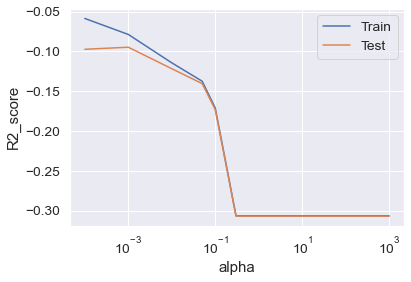

In [67]:
# Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in both train and test error.
- However, when alpha value is around 0.05 the error for both train and test data falls really low and remains constant.

### Ridge Regression

In [68]:
# Now to create a Ridge Regression model
# we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# View the optimal best value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [70]:
# let's check the cross validation results 
ridgeCV.cv_results_

{'mean_fit_time': array([0.06203232, 0.03994908, 0.03441591, 0.03424082, 0.03647676,
        0.03668485, 0.0322619 , 0.03176122, 0.03623633, 0.03219972,
        0.02707324, 0.02602434, 0.03349915, 0.03504124, 0.02723713,
        0.02517538, 0.02725687, 0.02348757, 0.0321703 , 0.02904305,
        0.03230066, 0.03303823, 0.03316832, 0.03146858, 0.02956905,
        0.02872591, 0.03212714, 0.02948766]),
 'std_fit_time': array([0.00342155, 0.0110271 , 0.00649157, 0.00277671, 0.00232695,
        0.00626769, 0.01144343, 0.00842715, 0.00955936, 0.00094352,
        0.00623284, 0.01203   , 0.00370414, 0.00595875, 0.00637851,
        0.00780032, 0.00661147, 0.00698203, 0.00095545, 0.01089166,
        0.00369919, 0.00330386, 0.00577281, 0.00988569, 0.00517259,
        0.01169296, 0.0010629 , 0.00840296]),
 'mean_score_time': array([0.00440021, 0.01141157, 0.003124  , 0.01275415, 0.01105628,
        0.00694346, 0.01097293, 0.0094914 , 0.00312481, 0.00624995,
        0.00642047, 0.00937614, 0.006247

In [71]:
# Creating a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [72]:
# Fitting the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [73]:
# let's view the coefficients of ridge regression fitted model
ridge.coef_

array([-0.009892  ,  0.01854997,  0.02786296,  0.0009008 , -0.00527408,
        0.00784689,  0.00114946, -0.00162425,  0.02852384,  0.04699377,
        0.00667793,  0.06057159,  0.02304108,  0.00183606,  0.02297607,
        0.01626389,  0.00875368, -0.02008876,  0.0271567 ,  0.01806121,
        0.04562391,  0.0045875 ,  0.01344322, -0.00143441,  0.01028305,
        0.0077751 ,  0.01833962, -0.0063329 , -0.00314437,  0.00543039,
       -0.05507707, -0.07366576,  0.00901883,  0.00429442,  0.00708628,
       -0.02757963,  0.04481538,  0.02213708, -0.00266864,  0.00322621,
        0.00038573, -0.02315705, -0.07693429, -0.0191954 ,  0.00407947,
        0.0382338 ,  0.00967852,  0.03745333, -0.01241562,  0.00694367,
       -0.01874101,  0.04343182,  0.02098498, -0.04045125,  0.00308645,
        0.0689714 ,  0.01764227,  0.05225257, -0.01366418,  0.03180001,
       -0.03753896, -0.01403624, -0.01351916, -0.01270235, -0.00544284,
       -0.00643872,  0.0012311 ,  0.0253724 ,  0.03407242, -0.01

In [74]:
# Making predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [75]:
# Checking evaluation metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.89
RSS (Train) = 11.92
RSS (Test) = 8.31
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


In [76]:
# Creating a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062032,0.003422,0.004400,0.000211,0.0001,{'alpha': 0.0001},-0.110593,-0.148323,-0.132199,-0.107720,-0.112370,-0.122241,0.015642,28,-0.053520,-0.046617,-0.046606,-0.052484,-0.053972,-0.050640,0.003324
1,0.039949,0.011027,0.011412,0.011021,0.001,{'alpha': 0.001},-0.107646,-0.147030,-0.129851,-0.107895,-0.111657,-0.120816,0.015447,27,-0.053650,-0.046708,-0.046692,-0.052626,-0.054006,-0.050737,0.003327
2,0.034416,0.006492,0.003124,0.006248,0.01,{'alpha': 0.01},-0.103478,-0.141192,-0.124175,-0.105589,-0.108117,-0.116510,0.014335,25,-0.054653,-0.046957,-0.047607,-0.053437,-0.054351,-0.051401,0.003393
3,0.034241,0.002777,0.012754,0.003900,0.05,{'alpha': 0.05},-0.102357,-0.132114,-0.120515,-0.103488,-0.102743,-0.112243,0.012066,24,-0.057058,-0.047753,-0.051050,-0.056227,-0.055899,-0.053597,0.003601
4,0.036477,0.002327,0.011056,0.006293,0.1,{'alpha': 0.1},-0.102810,-0.127545,-0.119319,-0.103337,-0.100176,-0.110637,0.010819,22,-0.058849,-0.048374,-0.053574,-0.058378,-0.057410,-0.055317,0.003936
5,0.036685,0.006268,0.006943,0.006511,0.2,{'alpha': 0.2},-0.103522,-0.122885,-0.117867,-0.102821,-0.098232,-0.109065,0.009545,21,-0.061058,-0.049194,-0.056388,-0.060748,-0.059684,-0.057414,0.004431
6,0.032262,0.011443,0.010973,0.006230,0.3,{'alpha': 0.3},-0.103679,-0.119977,-0.116551,-0.102270,-0.097321,-0.107959,0.008742,20,-0.062446,-0.049790,-0.058098,-0.062065,-0.061198,-0.058719,0.004719
7,0.031761,0.008427,0.009491,0.007753,0.4,{'alpha': 0.4},-0.103777,-0.117825,-0.115584,-0.102043,-0.096940,-0.107234,0.008084,19,-0.063398,-0.050281,-0.059336,-0.062969,-0.062327,-0.059662,0.004901
8,0.036236,0.009559,0.003125,0.006250,0.5,{'alpha': 0.5},-0.103592,-0.116189,-0.114743,-0.101812,-0.096589,-0.106585,0.007622,18,-0.064101,-0.050684,-0.060278,-0.063666,-0.063185,-0.060383,0.005031
9,0.032200,0.000944,0.006250,0.007655,0.6,{'alpha': 0.6},-0.103313,-0.114892,-0.113943,-0.101486,-0.096297,-0.105986,0.007265,17,-0.064662,-0.051034,-0.061039,-0.064221,-0.063908,-0.060973,0.005130


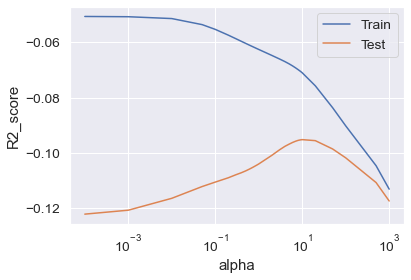

In [77]:
# Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- We can see, as the value of alpha increases, there is a decrease in train error, however there is an initial increase in test error but eventually decreases later.
- In addition, it is evident that the optimal value of alpha is 10 after which the error continues to decrease.

### Comparing Both Models

In [78]:
# Setting float display options
pd.options.display.float_format = "{:,.2f}".format
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.92,0.91
R2 Score (Test),0.89,0.89
RSS (Train),11.92,15.02
RSS (Test),8.31,8.52
MSE (Train),0.01,0.01
MSE (Test),0.02,0.02
RMSE (Train),0.11,0.12
RMSE (Test),0.14,0.14


- R-squared value on test data for both the regression models is same i.e., 0.89.
- Similarly, Mean Squared Error on test data for both the models is same too. i.e., 0.02.
- Both the models are performing pretty well and giving excatly same results.

In [79]:
# Now we can notice the changes in coefficients after regularization

# First creating empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [80]:
# Now filling in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [81]:
# checking the betas/coefficients
betas 

,Ridge,Lasso
LotFrontage,-0.01,-0.01
LotArea,0.02,0.02
YearRemodAdd,0.03,0.03
MasVnrArea,0.00,-0.00
BsmtFinSF1,-0.01,-0.00
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.00,0.00
TotalBsmtSF,-0.00,0.00
1stFlrSF,0.03,0.00
2ndFlrSF,0.05,0.00


In [82]:
# Let's look at the number of features removed by lasso
betas[betas['Lasso']==0].shape

(282, 2)

In [83]:
# Let's look at the number of features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage             -0.01
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF2               0.00
BsmtUnfSF                0.00
TotalBsmtSF              0.00
2ndFlrSF                 0.00
LowQualFinSF             0.00
GrLivArea                0.11
BsmtFullBath             0.02
BsmtHalfBath             0.00
FullBath                 0.02
HalfBath                 0.01
BedroomAbvGr             0.00
KitchenAbvGr            -0.03
TotRmsAbvGrd             0.03
Fireplaces               0.02
GarageCars               0.06
GarageArea               0.00
WoodDeckSF               0.01
EnclosedPorch            0.01
3SsnPorch                0.01
ScreenPorch              0.02
PoolArea                -0.01
MiscVal                 -0.00
MoSold                   0.00
Age                     -0.05
MSSubClass_30           -0.07
MSSubClass_60           -0.04
MSSubClass_70            0.00
MSSubClass_160          -0.08
MSZoning_RL              0.00
MSZoning_RM             -0.04
Alley_Pave

###### Top 10 features selected by Ridge and Lasso Regression which plays a significant role in predicting the 'SalePrice' of a house

In [84]:
# Let's check out the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
Neighborhood_StoneBr   0.09
Neighborhood_NridgHt   0.08
Neighborhood_Crawfor   0.08
OverallQual_8          0.08
Exterior1st_BrkFace    0.08
CentralAir_Y           0.07
LandContour_HLS        0.07
BsmtCond_TA            0.07
OverallCond_9          0.07
Name: Ridge, dtype: float64

In [85]:
# To understand the ridge coefficients in terms of target, we have to take inverse log (i.e. exponential power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
Neighborhood_StoneBr   1.09
Neighborhood_NridgHt   1.09
Neighborhood_Crawfor   1.09
OverallQual_8          1.08
Exterior1st_BrkFace    1.08
CentralAir_Y           1.07
LandContour_HLS        1.07
BsmtCond_TA            1.07
OverallCond_9          1.07
Name: Ridge, dtype: float64

In [86]:
# checking the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.18
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.10
Neighborhood_NridgHt   0.09
Neighborhood_StoneBr   0.09
Exterior1st_BrkFace    0.08
CentralAir_Y           0.08
Functional_Typ         0.07
BsmtCond_TA            0.07
Name: Lasso, dtype: float64

In [87]:
# To understand the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.19
GrLivArea              1.12
OverallQual_8          1.10
Neighborhood_Crawfor   1.10
Neighborhood_NridgHt   1.10
Neighborhood_StoneBr   1.09
Exterior1st_BrkFace    1.09
CentralAir_Y           1.08
Functional_Typ         1.07
BsmtCond_TA            1.07
Name: Lasso, dtype: float64

## Conclusion:

After we performing Lasso and Ridge regression, we found -

 
 - Optimal value of alpha for Lasso Regression = 0.001
 - Optimal value of alpha for Ridge Regression = 10
 
 (Where, alpha is a penalty parameter that is equivalent to the square of the magnitude of the coefficients.)

##### Business Goal 1
- **The most significant variables in predicting the 'SalePrice' of a house are: -**
      - GrLivArea, 
      - TotalBsmtSF
      - CentralAir_Y
      - OverallQual_9 
      - OverallCond_9 
      - OverallQual_8 
      - Functional_Typ
      - Condition1_Norm
      - Exterior1st_BrkFace
      - Neighborhood_Crawfor 
      - SaleCondition_Alloca 
      - Neighborhood_Somerst  
      
##### Business Goal 2
- **How well those variables describe the price of a house?**
  
Let's look at the top five variables playing the most crucial role in deciding the 'SalePrice' of house.

 **1 - OverallQual_9 & OverallQual_8:** if we improvise the material and finish of the house, and if it is rated under Very Good to Excellent category, the price of house will increase by 1.13 to 1.19 times.
 
 **2 - GrLivArea:** If the area above ground has been improved by 1 sqft, the 'SalePrice' will increase by 1.12 times
 
 **3 - Neighborhood_Crawfor:** if the house is located in the Crawfor neighborhood, then the 'SalePrice' will hike by 1.09 to 1.10 times. So, the company should sought out for houses in Crawfor neighborhood. 
 
 **4 - CentralAir_Y:** If the house has a Central Air facility, then the 'SalePrice' of house will increase by 1.06 to 1.08 times.
 
 **5 - Exterior1st_BrkFace:** The houses with exterior designed in brick face has an impact of increasing the 'SalePrice' of the hosue by 1.07 to 1.09 times.
 
Similarly, we can look at all the important variables mentioned above and interprete how each variable plays a versatile role in deciding the price of a house.



**Question 1 - Coding part** 
If we double the value of alpha for both ridge and lasso, what effect or changes would we have ?


Optimal value of alpha for Lasso Regression = 0.001

Optimal value of alpha for Ridge Regression = 10

if we double them :
 alpha for lasso = 0.002
 alpha for ridge = 20

In [88]:
# For Ridge Regresiion
# setting the value of alpha as 20 for ridge regression
ridge = Ridge(alpha=20)

# Fitting the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [89]:
# Making predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [90]:
# Checking the evaluation values
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.89
RSS (Train) = 13.38
RSS (Test) = 8.36
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


- R-squared value and Mean Squared Error **value for test data are the same as before** when alpha was = 10 in our Ridge regression model i.e., 0.89 and 0.02.

In [91]:
# For Lasso regression
# building the lasso model with double value of alpha as 0.002
lasso = Lasso(alpha=0.002)

# Fitting the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [92]:
# Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [93]:
# Checking the evaluation values
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.88
R-Squared (Test) = 0.87
RSS (Train) = 18.54
RSS (Test) = 9.32
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.13
RMSE (Test) = 0.15


- The R-squared value has a **very negligible change of 0.02** in the test data of Lasso regression model, however, the **Mean Squared Error value is still the same.**

In [94]:
# First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
# filling in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
# let's take look at the betas
betas

,Ridge,Lasso
LotFrontage,-0.01,-0.00
LotArea,0.02,0.01
YearRemodAdd,0.03,0.04
MasVnrArea,0.00,0.00
BsmtFinSF1,-0.00,0.00
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.00,0.00
TotalBsmtSF,0.00,0.02
1stFlrSF,0.03,0.00
2ndFlrSF,0.04,0.00


In [95]:
# Now the top 10 coefficients as per Ridge regression model
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9          0.10
OverallQual_8          0.07
Neighborhood_Crawfor   0.07
Neighborhood_NridgHt   0.07
Exterior1st_BrkFace    0.06
Neighborhood_StoneBr   0.06
CentralAir_Y           0.06
Functional_Typ         0.06
GrLivArea              0.06
BsmtCond_TA            0.06
Name: Ridge, dtype: float64

In [96]:
# let's take inverse log of betas like we did before
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.10
OverallQual_8          1.07
Neighborhood_Crawfor   1.07
Neighborhood_NridgHt   1.07
Exterior1st_BrkFace    1.07
Neighborhood_StoneBr   1.06
CentralAir_Y           1.06
Functional_Typ         1.06
GrLivArea              1.06
BsmtCond_TA            1.06
Name: Ridge, dtype: float64

In [97]:
# Now the top 10 coefficients as per Lasso regression model
betas['Lasso'].sort_values(ascending=False)[:10] 

OverallQual_9          0.16
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.08
CentralAir_Y           0.07
Functional_Typ         0.07
GarageCars             0.06
Exterior1st_BrkFace    0.05
Neighborhood_NridgHt   0.05
Condition1_Norm        0.04
Name: Lasso, dtype: float64

In [98]:
# Let's take ithe nverse log of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.18
GrLivArea              1.11
OverallQual_8          1.10
Neighborhood_Crawfor   1.08
CentralAir_Y           1.07
Functional_Typ         1.07
GarageCars             1.07
Exterior1st_BrkFace    1.05
Neighborhood_NridgHt   1.05
Condition1_Norm        1.05
Name: Lasso, dtype: float64

The most Significant variables after doubling the values of alpha are -
 - OverallQual_9 
 - GrLivArea
 - OverallQual_8          
 - Neighborhood_Crawfor  
 - CentralAir_Y    
 - Functional_Typ    
 - GarageCars     
 - Exterior1st_BrkFace  
 - Neighborhood_NridgHt
 - Condition1_Norm   

**Question 3- Coding Part**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Ans -** 
Now that we don't have the top 5 features we should first drop the current top 5 features according to our current Lasso Regression model and rebuild the model again.
- **Current top 5 features** according to the existing Lasso model are - **OverallQual_9, GrLivArea, OverallQual_8 , Neighborhood_Crawfor, Neighborhood_NridgHt**
- **Step 1** - Dropping these 5 features from dataset
- **Step 2** - Building the Lasso model again
- **Step 3** - Finding the top 5 features from the existing list of variables.

In [99]:
# Keeping the top 5 features which would be removed in a list
five = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt']

In [100]:
# dropping these from the train and test dataset
X_train_new = X_train.drop(five, axis=1)
X_test_new = X_test.drop(five, axis=1)

In [101]:
# Let's build the Lasso Model again
# let's create a list of alphas to find the optimum value of alpha and cross validation

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Best optimal value for alpha would be
lassoCV.best_params_

{'alpha': 0.0001}

In [103]:
# initializing Lasso instance
lasso = Lasso(alpha=0.001)

In [104]:
# Fitting the model on our training data
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [105]:
# Let's check the predictions now
y_train_pred = lasso.predict(X_train_new)
y_pred = lasso.predict(X_test_new)

In [106]:
# Let's have a look at the Evaluation metrics 
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.87
RSS (Train) = 16.24
RSS (Test) = 9.40
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.13
RMSE (Test) = 0.15


In [ ]:
# Creating a table which will contain all the above metrics and their values

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

In [107]:
# initializing an empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns

In [108]:
# Now let's populate betas
betas['Lasso'] = lasso.coef_

In [109]:
# checking the beta coefficients
betas 

,Lasso
LotFrontage,-0.01
LotArea,0.01
YearRemodAdd,0.04
MasVnrArea,0.00
BsmtFinSF1,-0.00
BsmtFinSF2,0.00
BsmtUnfSF,0.00
TotalBsmtSF,0.01
1stFlrSF,0.07
2ndFlrSF,0.09


In [110]:
# Checking the new top5 predictors of Lasso model in descending order after dropping the previous top 5 predictors and 
# creating a new lasso regression model
betas['Lasso'].sort_values(ascending=False)[:5]

Exterior1st_BrkFace    0.10
2ndFlrSF               0.09
Neighborhood_StoneBr   0.09
BsmtCond_TA            0.08
CentralAir_Y           0.08
Name: Lasso, dtype: float64

- After dropping the previous top 5 predictors and building a new Lasso regression model with the left out predictors, we have our new top 5 significant variables-
- Exterior1st_BrkFace, 2ndFlrSF, Neighborhood_StoneBr, BsmtCond_TA, CentralAir_Y